<a href="https://colab.research.google.com/github/humayranaura/folium_project_n3ts/blob/main/HUMAYRA_NAURASHIBA_MARYAM_X4_Sukabumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

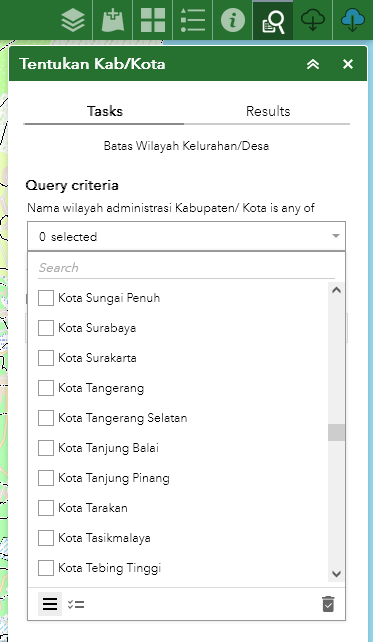

In [ ]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Sukabumi']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file path
csv_path = 'jumlah penduduk sukabumi.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, delimiter=';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk (jiwa)'] = csv_data['Jumlah penduduk (jiwa)'].astype(str).str.replace('.', '')
#csv_data['Jumlah penduduk (jiwa)'] = pd.to_numeric(csv_data['Jumlah penduduk (jiwa) '])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('Husein Sastranegara ', 'HUSEN SASTRANEGARA')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

       Kelurahan  Jumlah KK  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   GUNUNG PUYUH       8621         NaN         NaN         NaN         NaN   
1        KARAMAT      10253         NaN         NaN         NaN         NaN   
2      SRIWIDARI      10704         NaN         NaN         NaN         NaN   
3  KARANG TENGAH      19775         NaN         NaN         NaN         NaN   
4         CIKOLE       6017         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  
     OBJECTID      NAMOBJ       FCODE  \
60       61.0       Baros  BA03070040   
174     175.0    Cikundul  BA03070040   
211     212.0  Cipanengah  BA03070040   
393     394.0  Lembursitu  BA03070040   
662     

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Create a base map
m = folium.Map(location=[-6.932000, 106.918564],zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah KK'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

This cell output is too large and can only be displayed while logged in.


In [ ]:
# Create a base map
m = folium.Map(location=[-6.932000, 106.918564],zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMA SUKABUMI.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMA SUKABUMIcsv")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah KK'],
        aliases=['Kelurahan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

This cell output is too large and can only be displayed while logged in.


Analysis Question:

Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: Karang Tengah


Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:
    - karang tengah
    - Sukakarya
    - Dayeuhluhur
    - benteng
    - Gunung puyuh
    - Nyomplong
    - warudoyong
    - Sindangsari
    - situmekar
    - Cikundul
    - lembursitu
    - cipanengah
    - Sudajaya Hilir
    - Jayamekar
    - jayaraksa
    - Baros
    - Sidangpalay
    - Gedong panjang
    - tipar
    - Cibeureum Hilir
    - Sriwidari
    - Selabatu
    - Cikondang
    - Cisarua
    - Nanggeleng
    - babarakan
    - Cikole